In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
#math operations
import numpy as np
#machine learning
import cv2
import os
from random import shuffle
from tqdm import tqdm
import random
#for opening and loading image
from PIL import Image
#for preprocessing
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
#Doing One hot encoding as classifier has multiple classes
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from random import shuffle
#For augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#MobileNetV2 Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Model, layers
from numpy import loadtxt
import itertools
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:
# setting path of directory
B_DIR = "/content/drive/MyDrive/FSDC/train/BlackSpot new"
M_DIR = "/content/drive/MyDrive/FSDC/train/EUS new"
N_DIR = "/content/drive/MyDrive/FSDC/train/GillRot new"
H_DIR = "/content/drive/MyDrive/FSDC/train/Healthy new"
I_DIR = "/content/drive/MyDrive/FSDC/train/Infected With Ich new"
R_DIR = "/content/drive/MyDrive/FSDC/train/RedSpot new"

In [4]:
# storing all the files from directories PARA_DIR and NORM_DIR to Pimages and Nimages for accessing images directly
Bimages = os.listdir(B_DIR)
Mimages = os.listdir(M_DIR)
Nimages = os.listdir(N_DIR)
Himages = os.listdir(H_DIR)
Iimages = os.listdir(I_DIR)
Rimages = os.listdir(R_DIR)

In [5]:
# storing all the files from directories PARA_DIR and NORM_DIR to Pimages and Nimages for accessing images directly
Bimages = os.listdir(B_DIR)
Mimages = os.listdir(M_DIR)
Nimages = os.listdir(N_DIR)
Himages = os.listdir(H_DIR)
Iimages = os.listdir(I_DIR)
Rimages = os.listdir(R_DIR)

In [6]:
import os
import cv2
import numpy as np
from PIL import Image

data = []
labels = []

# BlackSpot
Blackspot = os.listdir("/content/drive/MyDrive/FSDC/train/BlackSpot new")
for a in Blackspot:
    try:
        image = cv2.imread("/content/drive/MyDrive/FSDC/train/BlackSpot new/" + a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

# EUS
EUS = os.listdir("/content/drive/MyDrive/FSDC/train/EUS new")
for b in EUS:
    try:
        image = cv2.imread("/content/drive/MyDrive/FSDC/train/EUS new/" + b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")

# Gill Rot
Gill = os.listdir("/content/drive/MyDrive/FSDC/train/GillRot new")
for c in Gill:
    try:
        image = cv2.imread("/content/drive/MyDrive/FSDC/train/GillRot new/" + c)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append(2)
    except AttributeError:
        print("")

# Healthy
Healthy = os.listdir("/content/drive/MyDrive/FSDC/train/Healthy new")
for d in Healthy:
    try:
        image = cv2.imread("/content/drive/MyDrive/FSDC/train/Healthy new/" + d)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append(3)
    except AttributeError:
        print("")

# Infected with Ich
Infected = os.listdir("/content/drive/MyDrive/FSDC/train/Infected With Ich new")
for e in Infected:
    try:
        image = cv2.imread("/content/drive/MyDrive/FSDC/train/Infected With Ich new/" + e)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append(4)
    except AttributeError:
        print("")

# RedSpot
Redspot = os.listdir("/content/drive/MyDrive/FSDC/train/RedSpot new")
for f in Redspot:
    try:
        image = cv2.imread("/content/drive/MyDrive/FSDC/train/RedSpot new/" + f)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append(5)
    except AttributeError:
        print("")


In [7]:
#converting features and labels in array
feats=np.array(data)
labels=np.array(labels)

In [8]:
# saving features and labels for later re-use
np.save("/content/drive/MyDrive/FSDC/train/feats_train",feats)
np.save("/content/drive/MyDrive/FSDC/train/labels_train",labels)
feats=np.load("/content/drive/MyDrive/FSDC/train/feats_train.npy")
labels=np.load("/content/drive/MyDrive/FSDC/train/labels_train.npy")
s=np.arange(feats.shape[0])
np.random.shuffle(s)
feats=feats[s]
labels=labels[s]
num_classes=len(np.unique(labels))
len_data=len(feats)
print(len_data)
print(num_classes)

1200
6


In [9]:
# splitting cells images into 80:20 ratio i.e., 80% for training and 20% for testing purpose
(x_train,x_test)=feats[(int)(0.2*len_data):],feats[:(int)(0.2*len_data)]
(y_train,y_test)=labels[(int)(0.2*len_data):],labels[:(int)(0.2*len_data)]


In [10]:
!pip install imblearn

In [11]:
import numpy as np
#from imblearn.over_sampling import SMOTE
#from sklearn.model_selection import train_test_split
#X=feats
#y=labels
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = feats
y = labels

# Check if the data needs to be reshaped
if len(X.shape) > 2:
    X = X.reshape(X.shape[0], -1)

# Perform SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [12]:
# Assuming you have X and y as your feature and target variables

In [13]:
# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [14]:
# Now you have balanced data, and you can train your model using X_train_resampled and y_train_resampled
import numpy as np
from sklearn.model_selection import train_test_split

In [15]:
# Assuming you have `data` as the feature data and `labels` as the corresponding labels
# Convert the data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming data is a list of images and labels is a corresponding list of labels
# Convert data to a NumPy array
data = np.array(data)
labels = np.array(labels)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Normalize the pixel values of the image data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

train_len = len(x_train)
test_len = len(x_test)

In [17]:
y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)
print(x_train)
print(x_test)
print(y_test)
print(y_train)

[[[[0.11372549 0.12156863 0.1254902 ]
   [0.11372549 0.12156863 0.1254902 ]
   [0.11372549 0.12156863 0.1254902 ]
   ...
   [0.16470589 0.16078432 0.16862746]
   [0.16470589 0.16078432 0.16862746]
   [0.16470589 0.16078432 0.16862746]]

  [[0.16470589 0.17254902 0.1764706 ]
   [0.16470589 0.17254902 0.1764706 ]
   [0.16470589 0.17254902 0.1764706 ]
   ...
   [0.25490198 0.2509804  0.25882354]
   [0.25490198 0.2509804  0.25882354]
   [0.25490198 0.2509804  0.25882354]]

  [[0.15686275 0.16470589 0.16862746]
   [0.15686275 0.16470589 0.16862746]
   [0.15686275 0.16470589 0.16862746]
   ...
   [0.24705882 0.24313726 0.2509804 ]
   [0.24705882 0.24313726 0.2509804 ]
   [0.24705882 0.24313726 0.2509804 ]]

  ...

  [[0.25882354 0.25882354 0.25882354]
   [0.23921569 0.23921569 0.23921569]
   [0.25882354 0.25882354 0.25882354]
   ...
   [0.41960785 0.41960785 0.41960785]
   [0.44705883 0.44705883 0.44705883]
   [0.45490196 0.45490196 0.45490196]]

  [[0.26666668 0.26666668 0.26666668]
   [0.2

#TRAINING MOBILENETV2 MODEL

In [18]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths to your data
train_data_dir = '/content/drive/MyDrive/FSDC/train'
test_data_dir = '/content/drive/MyDrive/FSDC/test'

# Define the image dimensions
img_height, img_width = 224, 224

# Define the batch size
batch_size = 64

# Create an ImageDataGenerator for training data with additional augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Increased rotation range
    zoom_range=0.4,      # Increased zoom range
    width_shift_range=0.3,
    height_shift_range=0.3,
    brightness_range=[0.5, 1.5],  # Add brightness adjustment
    shear_range=0.2,     # Add shear augmentation
    horizontal_flip=True,
    vertical_flip=True
)

# Create an ImageDataGenerator for testing data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for loading images from directories
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the MobileNetV2 base model (pre-trained on ImageNet)
base_model = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)
)

# Unfreeze the last few layers of the MobileNetV2 base model for fine-tuning
for layer in base_model.layers[-15:]:
    layer.trainable = True  # Increased the number of trainable layers

# Adjust the top layers of your model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Adjusted learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=100,  # Increased epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


Found 1200 images belonging to 6 classes.
Found 84 images belonging to 6 classes.
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/100
18/18 [==============================] - 312s 15s/step - loss: 1.9046 - accuracy: 0.2430 - val_loss: 1.1824 - val_accuracy: 0.6094
Epoch 2/100
18/18 [==============================] - 244s 13s/step - loss: 1.5405 - accuracy: 0.3803 - val_loss: 0.8732 - val_accuracy: 0.6094
Epoch 3/100
18/18 [==============================] - 243s 13s/step - loss: 1.2686 - accuracy: 0.5158 - val_loss: 0.6790 - val_accuracy: 0.7656
Epoch 4/100
18/18 [==============================] - 252s 14s/step - loss: 1.0704 - accuracy: 0.5836 - val_loss: 0.6472 - val_accuracy: 0.7500
Epoch 5/100
18/18 [==============================] - 244s 13s/step - loss: 0.9452 - accuracy: 0.6470 - val_loss: 0.5773 - val_accuracy: 0.7656
Epoch 6/100
18/18 [==============================] - 249s 14s/step - loss: 0.7766 - accuracy: 0.7262 - val_loss: 0.5940 - val_accuracy: 0.76

In [19]:
# Extract accuracy values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get the final accuracy values (after the last epoch)
final_train_accuracy = train_accuracy[-1]
final_val_accuracy = val_accuracy[-1]

# Display the final accuracy values
print(f'Final Training Accuracy: {final_train_accuracy:.4f}')
print(f'Final Validation Accuracy: {final_val_accuracy:.4f}')


Final Training Accuracy: 0.9859
Final Validation Accuracy: 0.9375


In [20]:
import os
from keras.models import load_model

# Check the contents of the specified directory
print(os.listdir('/content/drive/MyDrive/FSDC'))

# Compile the loaded model (optional, as it's already compiled in your original code)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], run_eagerly=True)

# Save the model to a different file (if needed)
model.save('/content/drive/MyDrive/FSDC/MN_model.h5')


['test', 'train', '.ipynb_checkpoints', 'EN_model.h5', 'EN_model_modified.h5', 'MN_model.h5']


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 1200 images belonging to 6 classes.
Found 84 images belonging to 6 classes.


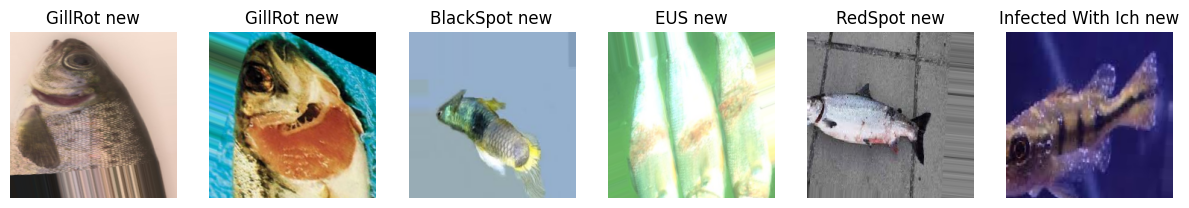

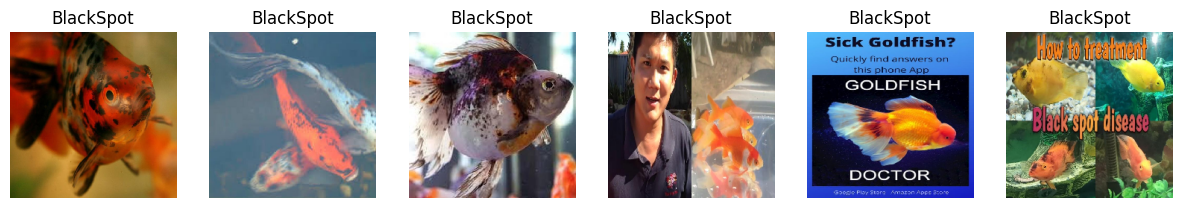

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Function to visualize sample images from the dataset
def visualize_dataset_samples(generator, num_samples=6):
    # Retrieve a batch of images and labels from the generator
    sample_images, sample_labels = next(generator)

    # Get class labels
    class_labels = list(generator.class_indices.keys())

    # Display sample images with their corresponding labels
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(sample_images[i])
        plt.title(class_labels[sample_labels[i].argmax()])
        plt.axis('off')
    plt.show()

# Define the paths to your data
train_data_dir = '/content/drive/MyDrive/FSDC/train'
test_data_dir = '/content/drive/MyDrive/FSDC/test'

# Define the image dimensions
img_height, img_width = 224, 224

# Define the batch size
batch_size = 64

# Create an ImageDataGenerator for training data with additional augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

# Create an ImageDataGenerator for testing data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for loading images from directories
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Visualize sample images from the training set
visualize_dataset_samples(train_generator)

# Visualize sample images from the test set
visualize_dataset_samples(test_generator)


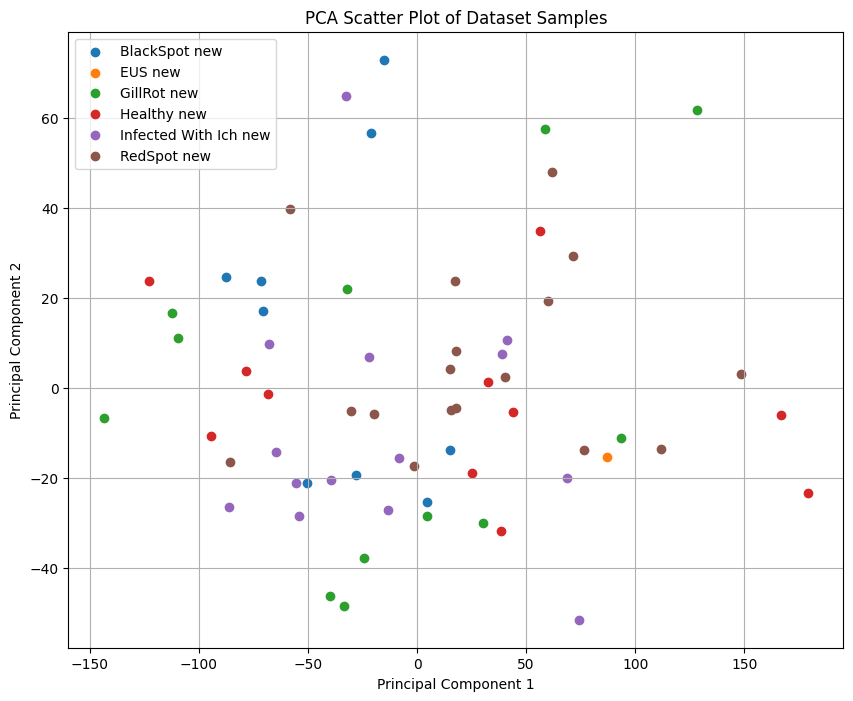

In [22]:
from sklearn.decomposition import PCA
import numpy as np
# Function to perform PCA and visualize dataset samples in a scatter plot
def visualize_dataset_scatter(generator, num_samples=6):
    # Retrieve a batch of images and labels from the generator
    sample_images, sample_labels = next(generator)

    # Flatten the images
    flattened_images = sample_images.reshape(sample_images.shape[0], -1)

    # Perform PCA to reduce dimensionality to 2 components
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(flattened_images)

    # Plot the scatter plot
    plt.figure(figsize=(10, 8))
    for i in range(len(generator.class_indices)):
        indices = np.where(sample_labels.argmax(axis=1) == i)[0]
        plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=list(generator.class_indices.keys())[i])

    plt.title('PCA Scatter Plot of Dataset Samples')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize dataset samples in a scatter plot
visualize_dataset_scatter(train_generator)


2/2 [==============================] - 7s 1s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        31
           3       0.78      1.00      0.88        18
           4       1.00      1.00      1.00        13
           5       1.00      0.71      0.83         7

    accuracy                           0.93        84
   macro avg       0.94      0.88      0.90        84
weighted avg       0.94      0.93      0.92        84

ROC AUC: 0.9913299663299663


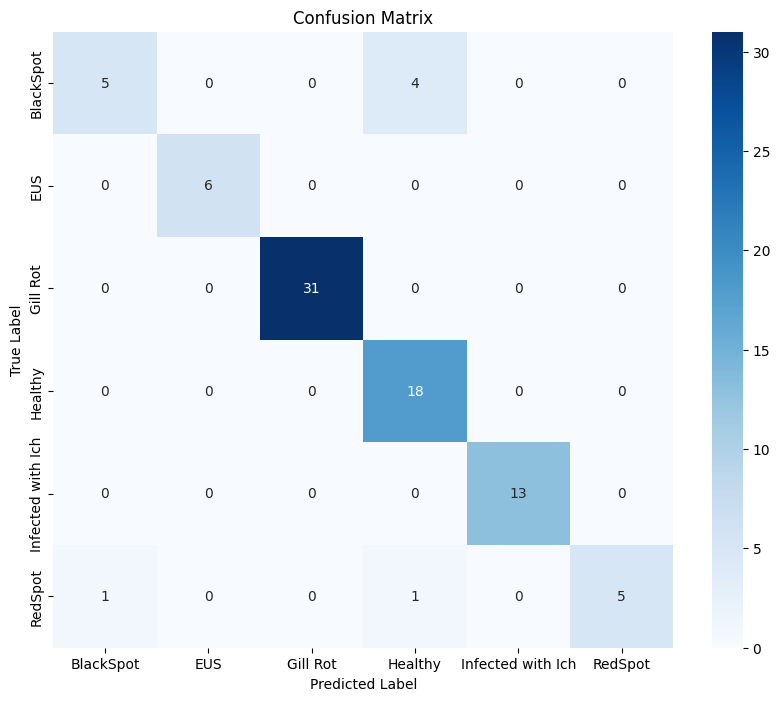

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, auc

# Get the predicted probabilities for the test set
y_pred_prob = model.predict(test_generator)

# Get the predicted classes for the test set
y_pred = np.argmax(y_pred_prob, axis=1)

# Get the true classes for the test set
y_true = test_generator.classes

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Calculate and print ROC AUC
roc_auc = roc_auc_score(y_true, y_pred_prob, multi_class='ovr')
print("ROC AUC:", roc_auc)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels
class_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix with custom colors
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


2/2 [==============================] - 7s 2s/step
Epoch 1/50
18/18 [==============================] - 259s 14s/step - loss: 0.4397 - accuracy: 0.8882 - val_loss: 7.5252 - val_accuracy: 0.4062
Epoch 2/50
18/18 [==============================] - 241s 13s/step - loss: 0.5291 - accuracy: 0.8380 - val_loss: 28.0557 - val_accuracy: 0.2656
Epoch 3/50
18/18 [==============================] - 238s 13s/step - loss: 0.4664 - accuracy: 0.8556 - val_loss: 17.6846 - val_accuracy: 0.3281
Epoch 4/50
18/18 [==============================] - 241s 13s/step - loss: 0.4031 - accuracy: 0.8785 - val_loss: 10.8160 - val_accuracy: 0.3438
Epoch 5/50
18/18 [==============================] - 231s 13s/step - loss: 0.4481 - accuracy: 0.8785 - val_loss: 7.3481 - val_accuracy: 0.5312
Epoch 6/50
18/18 [==============================] - 228s 13s/step - loss: 0.3397 - accuracy: 0.9111 - val_loss: 16.3218 - val_accuracy: 0.1719
Epoch 7/50
18/18 [==============================] - 238s 13s/step - loss: 0.3159 - accuracy: 0

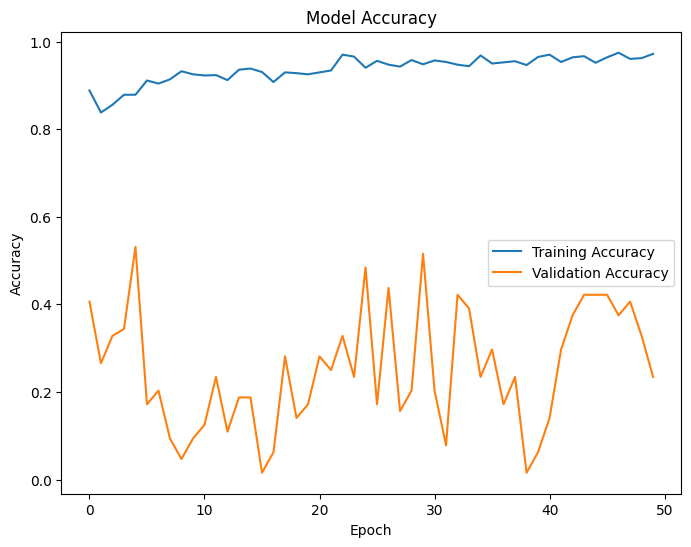

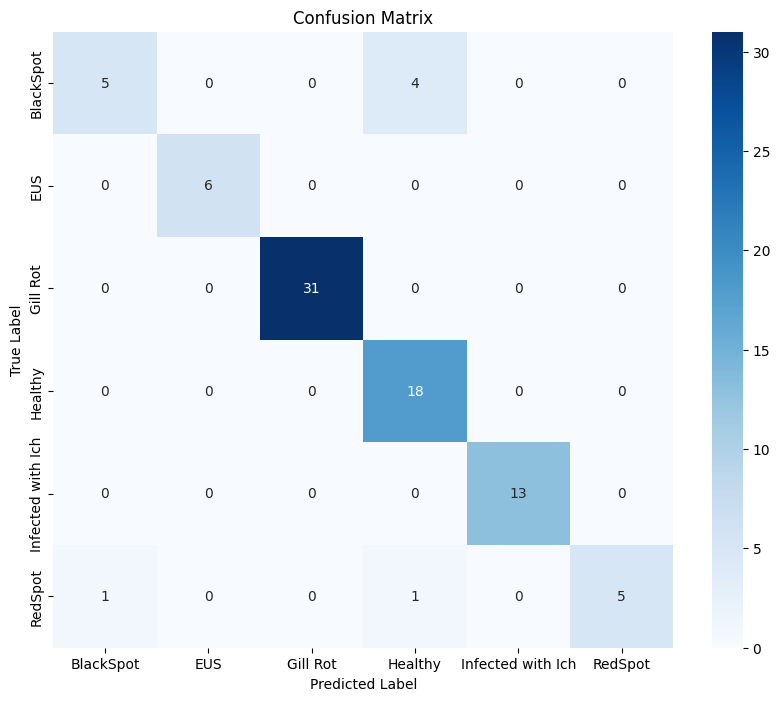

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        31
           3       0.78      1.00      0.88        18
           4       1.00      1.00      1.00        13
           5       1.00      0.71      0.83         7

    accuracy                           0.93        84
   macro avg       0.94      0.88      0.90        84
weighted avg       0.94      0.93      0.92        84



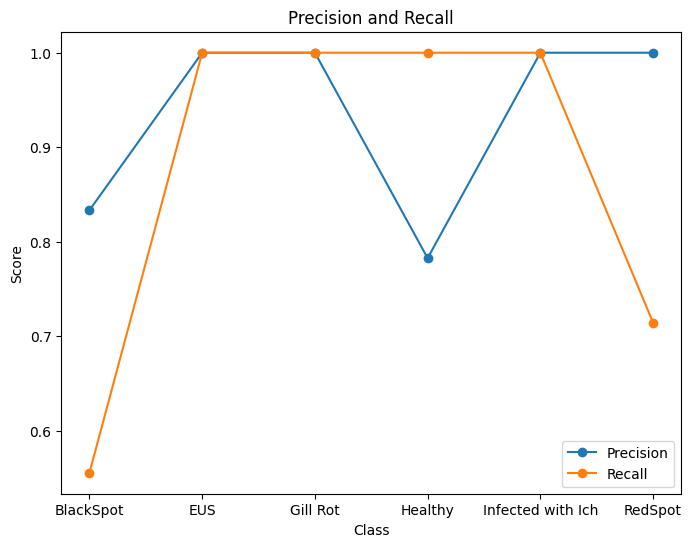

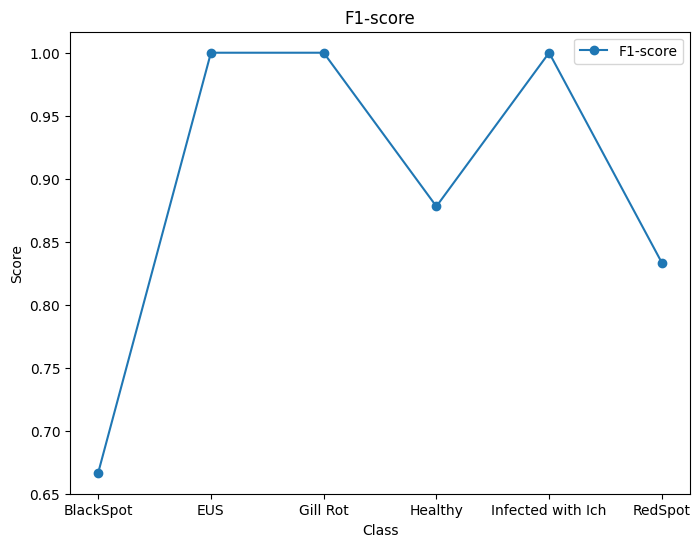

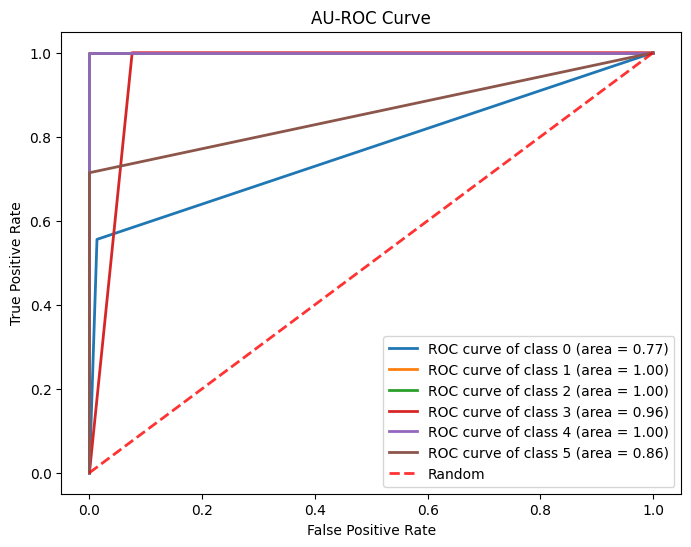

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Get the predicted probabilities for the test set
y_pred_prob = model.predict(test_generator)

# Get the predicted classes for the test set
y_pred = np.argmax(y_pred_prob, axis=1)

# Get the true classes for the test set
y_true = test_generator.classes

# Train the model and store the history
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Plot Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Calculate and plot Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print and plot Precision and Recall
print("Classification Report:")
print(classification_report(y_true, y_pred))
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)
plt.figure(figsize=(8, 6))
plt.plot(precision, label='Precision', marker='o')
plt.plot(recall, label='Recall', marker='o')
plt.title('Precision and Recall')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.legend()
plt.show()

# Calculate and plot F1-score
f1 = f1_score(y_true, y_pred, average=None)
plt.figure(figsize=(8, 6))
plt.plot(f1, label='F1-score', marker='o')
plt.title('F1-score')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.legend()
plt.show()

# Calculate and plot AU-ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_true))[:, i], np.array(pd.get_dummies(y_pred))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AU-ROC Curve')
plt.legend()
plt.show()


In [25]:
from IPython.display import display
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

class_dict = {
    "Blackspot": 0,
    "EUS": 1,
    "Gill rot": 2,
     "Healthy":3,
     "Infected":4,
    "Redspot": 5
}

def pred_image(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))  # target_size must agree with what the trained model expects!!

    # Preprocessing the image
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img.astype('float32') / 255

    preds = model.predict(img)
    pred = np.argmax(preds, axis=1)
    pred_cat = [k for k, v in class_dict.items() if v == pred[0]][0]
    return pred_cat

# Load your trained model
your_trained_model = load_model('/content/drive/MyDrive/FSDC/MN_model.h5')

# Example usage
img1 = '/content/drive/MyDrive/FSDC/test/Gill Rot/Gill Rot15.jpg'
img2 = '/content/drive/MyDrive/FSDC/test/BlackSpot/BlackSpot1.jpg'
img3 = '/content/drive/MyDrive/FSDC/test/Healthy/Healthy11.jpg'
img4 = '/content/drive/MyDrive/FSDC/test/Infected with Ich/Infected with Ich11.jpg'
img5 = '/content/drive/MyDrive/FSDC/test/RedSpot/RedSpot1.jpg'
img6 = '/content/drive/MyDrive/FSDC/test/EUS/EUS1.jpg'



prediction1 = pred_image(img1, your_trained_model)
prediction2 = pred_image(img2, your_trained_model)
prediction3 = pred_image(img3, your_trained_model)
prediction4 = pred_image(img4, your_trained_model)
prediction5 = pred_image(img5, your_trained_model)
prediction6 = pred_image(img6, your_trained_model)

# Print predictions and actual image types
print("Prediction for", img1, ":", prediction1, "(Actual: Gill Rot)")
print("Prediction for", img2, ":", prediction2, "(Actual: BlackSpot)")
print("Prediction for", img3, ":", prediction3, "(Actual: Healthy)")
print("Prediction for", img4, ":", prediction4, "(Actual: Infected with Ich)")
print("Prediction for", img5, ":", prediction5, "(Actual: RedSpot)")
print("Prediction for", img6, ":", prediction6, "(Actual: EUS)")


1/1 [==============================] - 0s 50ms/step
Prediction for /content/drive/MyDrive/FSDC/test/Gill Rot/Gill Rot15.jpg : Gill rot (Actual: Gill Rot)
Prediction for /content/drive/MyDrive/FSDC/test/BlackSpot/BlackSpot1.jpg : Blackspot (Actual: BlackSpot)
Prediction for /content/drive/MyDrive/FSDC/test/Healthy/Healthy11.jpg : Healthy (Actual: Healthy)
Prediction for /content/drive/MyDrive/FSDC/test/Infected with Ich/Infected with Ich11.jpg : Infected (Actual: Infected with Ich)
Prediction for /content/drive/MyDrive/FSDC/test/RedSpot/RedSpot1.jpg : Redspot (Actual: RedSpot)
Prediction for /content/drive/MyDrive/FSDC/test/EUS/EUS1.jpg : EUS (Actual: EUS)


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Define the extract_features function
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img.astype('float32') / 255
    features = model.predict(img)
    return features.flatten()

# Load your trained model
your_trained_model = load_model('/content/drive/MyDrive/FSDC/MN_model.h5')

# Images
img1 = '/content/drive/MyDrive/FSDC/train/BlackSpot new/BlackSpot 125.jpg'
img2 = '/content/drive/MyDrive/FSDC/train/EUS new/EUS 194.jpg'
img3 = '/content/drive/MyDrive/FSDC/train/GillRot new/Gill Rot151.jpg'
img4 = '/content/drive/MyDrive/FSDC/train/Healthy new/Healthy 142.jpg'
img5 = '/content/drive/MyDrive/FSDC/train/Infected With Ich new/Infected With Ich 111.jpg'
img6 = '/content/drive/MyDrive/FSDC/train/RedSpot new/RedSpot130.jpg'

# Extract features for all images
feature_vectors = []
for img_path in [img1, img2, img3, img4, img5, img6]:
    features = extract_features(img_path, your_trained_model)
    feature_vectors.append(features)

# Check the number of samples
num_samples = len(feature_vectors)
print("Number of samples:", num_samples)

# Determine the valid range of number of clusters
min_clusters = 2
max_clusters = num_samples - 1

# Adjust the number of clusters if necessary
num_clusters = min(5, max_clusters)  # Choose a number between 2 and 5 (inclusive)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(feature_vectors)

1/1 [==============================] - 0s 87ms/step
Number of samples: 6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
# Compute Davies-Bouldin index
davies_bouldin_score_value = davies_bouldin_score(feature_vectors, cluster_labels)
print("Davies-Bouldin Score:", davies_bouldin_score_value)

Davies-Bouldin Score: 0.5760213019811631


In [18]:
!pip install streamlit

In [19]:
!pip install pyngrok

In [12]:
!wget -q -O - ipv4.icanhazip.com

34.41.166.223


In [13]:
%%writefile app.py

import streamlit as st
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model
from streamlit_colab import sttuner

# Function to predict image class
def predict_image(img_path, model):
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Resize image to match model input size
    img = np.array(img) / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    return class_index

# Load the pre-trained model
model_path = "/content/drive/MyDrive/FSDC/MN_model.h5"
loaded_model = load_model(model_path)

# Streamlit app
st.title('Fish Disease Detection')

# Sidebar for uploading image
st.sidebar.title('Upload Image')
uploaded_file = st.sidebar.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

# Main content area
if uploaded_file is not None:
    # Display the uploaded image
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)

    # Make prediction when button is clicked
    if st.button('Classify'):
        # Predict image class
        class_index = predict_image(uploaded_file, loaded_model)

        # Define class labels
        class_labels = {
            0: 'BlackSpot',
            1: 'EUS',
            2: 'Gill rot',
            3: 'Healthy',
            4: 'Infected',
            5: 'RedSpot'
        }

        # Get class label for predicted index
        predicted_class = class_labels[class_index]

        # Display prediction result
        st.write('Predicted Class:', predicted_class)

Overwriting app.py


In [8]:
 ! pip install pyngrok

In [14]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.41.166.223:8501

npx: installed 22 in 3.217s
your url is: https://kind-tigers-cut.loca.lt
2024-04-24 06:03:02.035218: I tensorflow/core/tpu/tpu_api_dlsym_initializer.cc:95] Opening library: /usr/local/lib/python3.10/dist-packages/tensorflow/python/platform/../../libtensorflow_cc.so.2
2024-04-24 06:03:02.035377: I tensorflow/core/tpu/tpu_api_dlsym_initializer.cc:119] Libtpu path is: libtpu.so
2024-04-24 06:03:03.301812: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 06:03:08.202 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/